# **Subgaussian Distributions**

**Definition**
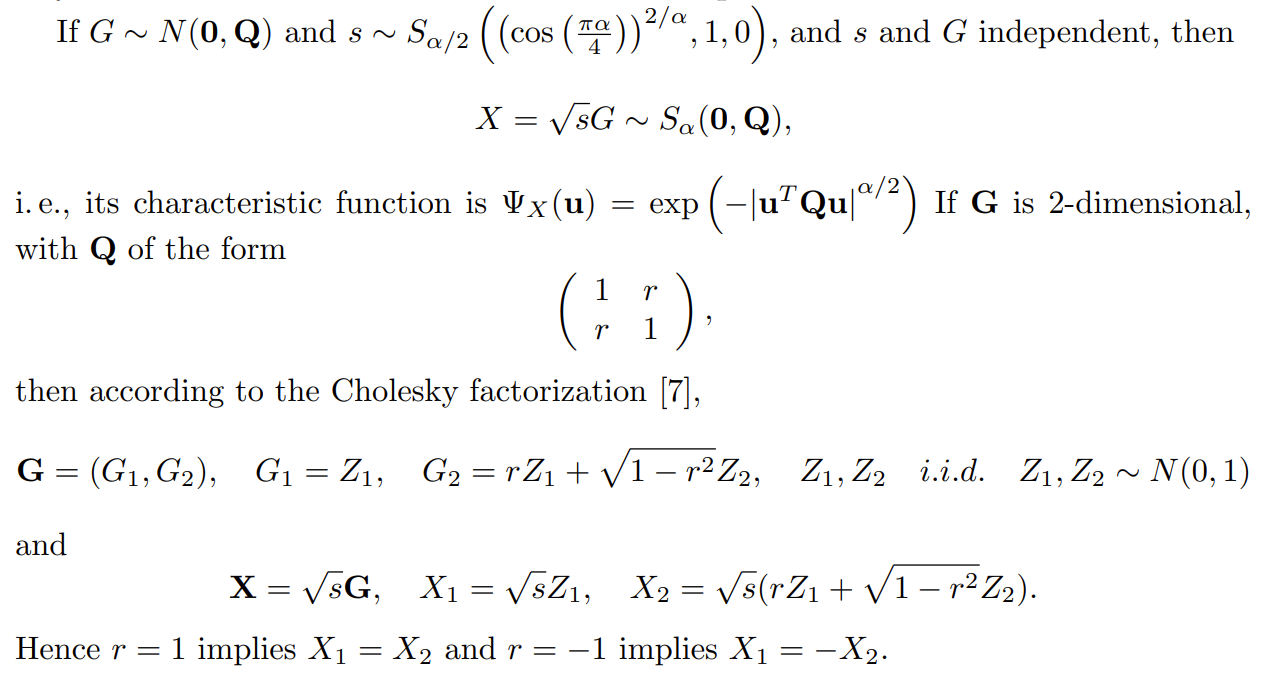

In the [paper](https://eudml.org/doc/262151) (**Section 5.3**), it is proven that in the case of subgaussian distributions on dimension $n$, i.e. $\mathbf{X}=(X_1,X_2,...,X_n)$, the dependence structure between the variables can be assessed only from the pairs $X_i, X_j$ with $i,j=1,2,...,n$. Therefore, the ability to estimate the $r$ parameter between any pair of random variables is sufficient for the estimating of the entire matrix $\mathbf{Q}$.

**Characteristic function**

The characteristic function of a bivariate subgaussian stable distribution is defined as follows:

**Notation:**
Let $\mathbf{t}$ denote the vector $(t_1,t_2)$ and $$\mathbf{R}=\begin{pmatrix}
  1 & r\\ 
  r & 1
\end{pmatrix},$$ 
i.e., the value $r$ determines the dependence between $X_1$ and $X_2$, and if $\alpha=2$, then the $r$ is the correlation coefficient. 
$$\psi(t_1,t_2; \alpha, \mathbf{R}=\exp\left( - {\left| \mathbf{t}^\top \mathbf{R}\mathbf{t}\right|}^{\alpha/2} \right)=\exp\left(- {\left| \begin{pmatrix}
  t_1 & t_2 
\end{pmatrix} \begin{pmatrix}
  1 & r\\ 
  r & 1
\end{pmatrix} \begin{pmatrix}
  t_1 \\ 
  t_2 
\end{pmatrix}\right|}^{\frac{\alpha}{2}} \right)$$

**Target parameters**

The goal is to estimate $\alpha$ and $r$.



**Key features of the subgaussian distribution**

Note that if $$\mathbf{X}=(X_1, X_2)\sim \psi(t_1,t_2; \alpha, \mathbf{R})=\exp\left(- {\left| \begin{pmatrix}
  t_1 & t_2 
\end{pmatrix} \begin{pmatrix}
  1 & r\\ 
  r & 1
\end{pmatrix} \begin{pmatrix}
  t_1 \\ 
  t_2 
\end{pmatrix}\right|}^{\frac{\alpha}{2}} \right), $$
then $X_1,X_2\sim S_{\alpha}\left(\frac{1}{\sqrt{2}},0,0 \right)$, and we can estimate $\alpha$ from both samples and the resulting estimate is the average of the two. 

This estimate is taken for granted when estimating the $r$. When estimating the $r$, we assume that it is known. If $\mathrm{dim}(\mathbf{X})>2$, then we can estimate the $\alpha$ parameter from each marginal distribution and the resulting alpha would be the median of the $\mathrm{dim}(\mathbf{X})$ estimates.

**Estimation of $\mathbf{r}$**

Let us consider the random variables $X+Y$ where $$(X,Y)\sim \psi(t_1,t_2; \alpha, \mathbf{R})=\exp\left(- {\left| \begin{pmatrix}
  t_1 & t_2 
\end{pmatrix} \begin{pmatrix}
  1 & r\\ 
  r & 1
\end{pmatrix} \begin{pmatrix}
  t_1 \\ 
  t_2 
\end{pmatrix}\right|}^{\frac{\hat{\alpha}}{2}} \right).$$

Then $$\mathbb{E}(\exp(i \cdot t\cdot (X+Y)))=\exp\left(- {\left| \begin{pmatrix}
  t & t 
\end{pmatrix} \begin{pmatrix}
  1 & r\\ 
  r & 1
\end{pmatrix} \begin{pmatrix}
  t \\ 
  t 
\end{pmatrix}\right|}^{\frac{\hat{\alpha}}{2}} \right)=$$
$$=\exp\left(- {\left|(1+r) \begin{pmatrix}
  t & t 
\end{pmatrix}  \begin{pmatrix}
  t \\ 
  t 
\end{pmatrix}\right|}^{\frac{\hat{\alpha}}{2}} \right)=\exp\left(-{\left(\sqrt{2(1+r)}\cdot|t|\right)}^{\alpha}\right).$$

Note that when $r=-1$, then the sum $X+Y$ is a degenerate random variable. 



In [ ]:
import numpy as np
import numpy as np
from scipy.stats import levy_stable
import matplotlib.pyplot as plt

In [ ]:
def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

In [ ]:
def corr_biv(matrix):
    corr_matrix = np.corrcoef(matrix, rowvar=False)
    # extract the correlation coefficient between the two columns
    corr_coefficient = corr_matrix[0, 1]
    return corr_coefficient

def generate_bivariate_sub_gaussian_samples(a, r, N):
    # Generation of the bi-variate normal distribution
    mean = [0, 0]
    std = [1, 1]
    # covariance matrix
    cov = [[std[0]**2, r*std[0]*std[1]], [r*std[0]*std[1], std[1]**2]]
    # generate random samples
    samples = np.random.multivariate_normal(mean, cov, N)
    if a >= 2:
       return samples
    else:
       alpha = a/2
       sigma = (np.cos(np.pi*a/4))**(2/a)
       beta = 1
       mu = 0
       # generate random samples from the stable distribution
       stable_sample = levy_stable.rvs(alpha, beta, loc=mu, scale=sigma, size=N)
       samples[:, 0] = samples[:, 0]*np.sqrt(stable_sample)
       samples[:, 1] = samples[:, 1]*np.sqrt(stable_sample)
       return samples
      

The Pearson correlation between the two samples:  0.3767828967167451


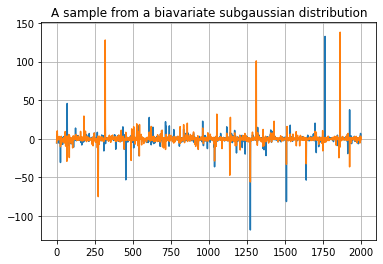

In [ ]:
samples = generate_bivariate_sub_gaussian_samples(1.2, 0.5, 2000)
sum_samples = samples[:, 0] + samples[:, 1]
plt.plot(samples)
plt.grid()
plt.title('A sample from a biavariate subgaussian distribution')
print(f"The Pearson correlation between the two samples:  {corr_biv(samples)}")

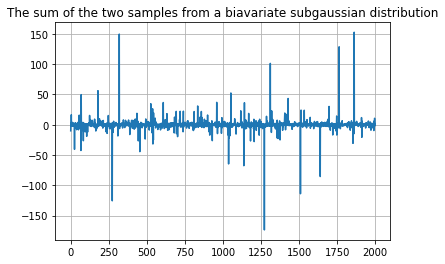

In [ ]:
plt.plot(sum_samples)
plt.title('The sum of the two samples from a biavariate subgaussian distribution')
plt.grid()

In [ ]:
portfolio_of_functions = {}
portfolio_of_functions.update({'sin(x)       ': np.vectorize(lambda x: np.sin(x))})
portfolio_of_functions.update({'x            ': np.vectorize(lambda x: x)})
portfolio_of_functions.update({'x**2         ': np.vectorize(lambda x: x*x)})
portfolio_of_functions.update({'x**3         ': np.vectorize(lambda x: x*x*x)})
portfolio_of_functions.update({'x**4         ': np.vectorize(lambda x: x*x*x*x)})
portfolio_of_functions.update({'x**5         ': np.vectorize(lambda x: x**5)})
portfolio_of_functions.update({'min(x**2,x)  ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'min(x**3,x)  ': np.vectorize(lambda x: min(x*x*x,x))})
portfolio_of_functions.update({'min(x^3,x^5) ': np.vectorize(lambda x: min(x**3,x**5))})
portfolio_of_functions.update({'sqrt(x)      ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'cos(x)       ': np.vectorize(lambda x: np.cos(x)*(x != 0)  )})
portfolio_of_functions.update({'x*exp(-x)    ': np.vectorize(lambda x: (x>1)*x**2+x*np.exp(-x))})
portfolio_of_functions.update({'x**4*exp(-x) ': np.vectorize(lambda x: (x>1)*x**4+x*np.exp(-x))})

In [ ]:
KEY = list(portfolio_of_functions.keys())
fun = KEY[8]

In [ ]:
portfolio_of_functions = {}
portfolio_of_functions.update({'sin(x)       ': np.vectorize(lambda x: np.sin(x))})
portfolio_of_functions.update({'x            ': np.vectorize(lambda x: x)})
portfolio_of_functions.update({'x**2         ': np.vectorize(lambda x: x*x)})
portfolio_of_functions.update({'x**3         ': np.vectorize(lambda x: x*x*x)})
portfolio_of_functions.update({'x**4         ': np.vectorize(lambda x: x*x*x*x)})
portfolio_of_functions.update({'x**5         ': np.vectorize(lambda x: x**5)})
portfolio_of_functions.update({'min(x**2,x)  ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'min(x**3,x)  ': np.vectorize(lambda x: min(x*x*x,x))})
portfolio_of_functions.update({'min(x^3,x^5) ': np.vectorize(lambda x: min(x**3,x**5))})
portfolio_of_functions.update({'sqrt(x)      ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'cos(x)       ': np.vectorize(lambda x: np.cos(x)*(x != 0)  )})
portfolio_of_functions.update({'x*exp(-x)    ': np.vectorize(lambda x: (x>1)*x**2+x*np.exp(-x))})
portfolio_of_functions.update({'x**4*exp(-x) ': np.vectorize(lambda x: (x>1)*x**4+x*np.exp(-x))})

KEY = list(portfolio_of_functions.keys())
fun = KEY[8]


def A(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-abs(A + B)**a) + np.exp(-abs(A - B)**a)
    return matrix

def B(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -abs(T)**a * np.log(abs(T)) * np.exp(-abs(T)**a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projection(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), FX))

def fisher_info(T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))

In [ ]:
def binary_search_min_of_function_aux(fun, start, end):
    left, right = start, end
    epsilon = 1e-10  # tolerance for the precision of the minimum
    while (right - left) > epsilon:
        mid = (left + right) / 2
        if fun(mid) <= fun(mid + epsilon):
            right = mid
        else:
            left = mid
    return left, fun(mid)

def extended_binary_search(fun, start, end):
    LIST = []
    arr = np.linspace(start, end, 10)
    for i in range(len(arr)):
        if i < len(arr) - 1:
          alph, J = binary_search_min_of_function_aux(fun, arr[i], arr[i+1])
          LIST.append([alph, J])
        else:
          if arr[i] < 2:
            alph, J = binary_search_min_of_function_aux(fun, arr[i], 2)
            LIST.append([alph, J])            
    min_second = min(item[1] for item in LIST)
    INDEX = [item[1] for item in LIST].index(min_second)
    output = LIST[INDEX][0]
    return output

def straightforward_search(fun, start, end):
    Alpha = list(np.arange(start_alpha, end_alpha, 0.01))+[]
    crit = []
    for al in Alpha:
        y = fun(al)
        crit.append(y)
    argmin = np.argmin(crit)
    return Alpha[argmin]

def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

In [ ]:
def alpha_estimates_tool(samples):
    start_alpha = 0.05 
    end_alpha = 1.98
    gran_of_choice = 0.01

    #samples = generate_bivariate_sub_gaussian_samples(test_alpha, r, N)
    #X = levy_stable.rvs(test_alpha, 0, size=N)
    alpha_ests = []
    for j_marginal in range(2):
        X = samples[:, j_marginal]*np.sqrt(2)
        estimates = []
        T = np.arange(0, 10, 0.07)
        T = portfolio_of_functions[fun](T)
        if max(T)<0.999:
          T[-1] = 0.999
        Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
        FX = F(X, T)
        crit = []
        for al in Alpha:
            y = projection(FX, T, al)
            crit.append(y)

        fun0 = lambda x: projection(FX, T, x)
        argmin = np.argmin(crit) 

        alpha_straightforward_search = Alpha[argmin]
        alpha_ests.append(alpha_straightforward_search)

    avg_alpha = np.mean(alpha_ests)
    return avg_alpha

In [ ]:
def generate_r_estimation(a1):

    geom = np.vectorize(lambda x, a:  np.exp(-((1+a))**(a1/2)*abs(x)**a1))         

    def A1(a, T):
        n = T.shape[0]
        A, B = np.meshgrid(T, T)
        matrix = geom(A + B, a) + geom(A - B, a)
        return matrix

    def B1(a, T):  
        T = np.array(T, dtype=np.float64)
        T[T == 0] = np.finfo(np.float64).eps
        #y = -T**a1*(2*(1+a))**(a1/2)*a1* geom(T, a)
        y = -T**a1*a1/2*(a + 1)**(a1/2 - 1)* geom(T, a)
        return y
        # -2*a1*(a + 1)**(a1/2 - 1)*x**a1*exp(-x**a1*(a + 1)**(a1/2)*2)
        
    def F1(X, T):
        X1 = np.outer(X, T)
        Y1 = np.cos(X1)
        FX = np.mean(Y1, axis=0)
        return 2*FX

    def projection1(FX, T, a):
        return abs(np.dot(np.dot(np.linalg.inv(A1(a, T)), B1(a, T)), FX))

    def fisher_info1(T, a):
        return abs(np.dot(np.dot(np.linalg.inv(A1(a, T)), B1(a, T)), B1(a, T)))
    return A1, B1, F1, projection1, fisher_info1

In [ ]:
def r_estimate(samples, alpha, gran_of_choice):
    X = samples[:, 0] + samples[:, 1]
    start_alpha = -0.99 
    end_alpha = 0.99
    
    Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
    FX = F(X, T)
    crit = []
    for al in Alpha:
        y = projection1(FX, T, al)
        crit.append(y)   
    argmin = np.argmin(crit) 
    alpha_straighforward = Alpha[argmin]
    return alpha_straighforward

In [ ]:
T = np.arange(0, 1.5, 0.07)
T = portfolio_of_functions[fun](T)
T = T*2
if max(T)<0.999:
  T[-1] = 2.999

In [ ]:
N = 1000000
alpha = 0.3
r = -0.29
samples = generate_bivariate_sub_gaussian_samples(alpha, r, N)
alph = alpha_estimates_tool(samples)

A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)

R_est = r_estimate(samples, alph, 0.01)
print(f"Estimation from {N} observations:")
print(f"real val of alpha = {truncate_string(alpha)}, real val of r = {truncate_string(r)}")
print(f"estimate of alpha = {truncate_string(alph)}, estimate of r = {truncate_string(R_est)}")

Estimation from 1000000 observations:
real val of alpha = 0.3000, real val of r = -0.290
estimate of alpha = 0.3000, estimate of r = -0.290


In [ ]:
Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alpha, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    #estimates = []
    T = np.arange(0, 1.5, 0.07)
    T = portfolio_of_functions[fun](T)
    T = T*2
    if max(T)<0.999:
      T[-1] = 2.999
    Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
    FX = F1(X, T)
    crit = []
    for al in Alpha:
        y = projection1(FX, T, al)
        crit.append(y)

    fun0 = lambda x: projection1(FX, T, x)

    argmin = np.argmin(crit) 
    #alpha_bin_search = extended_binary_search(fun0, start_alpha, end_alpha)
    alpha_straighforward = Alpha[argmin]
    estm = min(1,alpha_straighforward+abs(-1-alpha_straighforward))  
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(corr_biv(samples))
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}") 
  

for r = -0.900, avg_r_MLP = -0.895, avg_r_corr = -0.914, std(MLP) = 0.0147
for r = -0.850, avg_r_MLP = -0.850, avg_r_corr = -0.736, std(MLP) = 0.0303
for r = -0.800, avg_r_MLP = -0.785, avg_r_corr = -0.475, std(MLP) = 0.0301
for r = -0.750, avg_r_MLP = -0.756, avg_r_corr = -0.527, std(MLP) = 0.0338
for r = -0.700, avg_r_MLP = -0.714, avg_r_corr = -0.642, std(MLP) = 0.0535
for r = -0.650, avg_r_MLP = -0.657, avg_r_corr = -0.622, std(MLP) = 0.0469
for r = -0.600, avg_r_MLP = -0.605, avg_r_corr = -0.699, std(MLP) = 0.0719
for r = -0.550, avg_r_MLP = -0.571, avg_r_corr = -0.384, std(MLP) = 0.0739
for r = -0.500, avg_r_MLP = -0.508, avg_r_corr = -0.543, std(MLP) = 0.0781
for r = -0.450, avg_r_MLP = -0.464, avg_r_corr = -0.390, std(MLP) = 0.1014
for r = -0.400, avg_r_MLP = -0.361, avg_r_corr = -0.350, std(MLP) = 0.1245
for r = -0.350, avg_r_MLP = -0.331, avg_r_corr = -0.306, std(MLP) = 0.1172
for r = -0.300, avg_r_MLP = -0.339, avg_r_corr = -0.229, std(MLP) = 0.1114
for r = -0.250, avg_r_MLP

In [ ]:
def visualize(Alphas, Means, upper_line, lower_line):
  fig = plt.figure(figsize=(12, 14))
  plt.plot(Alphas, Means, 'g-o')
  plt.plot(Alphas, upper_line, 'b')
  plt.plot(Alphas, lower_line, 'r')
  plt.plot(Alphas, Alphas, 'k')
  plt.fill_between(Alphas, upper_line, lower_line, color='gray', alpha=0.5)
  plt.grid()
  plt.xlabel('r')
  plt.ylabel('r_estimate')
  plt.title(r'Demonstration of the average estimate and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N)+' and aux = '+fun)
  plt.legend(['$\mu$,  $\mu = avg(alpha\_sample)$','$ \mu + 3*\sigma$,  $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

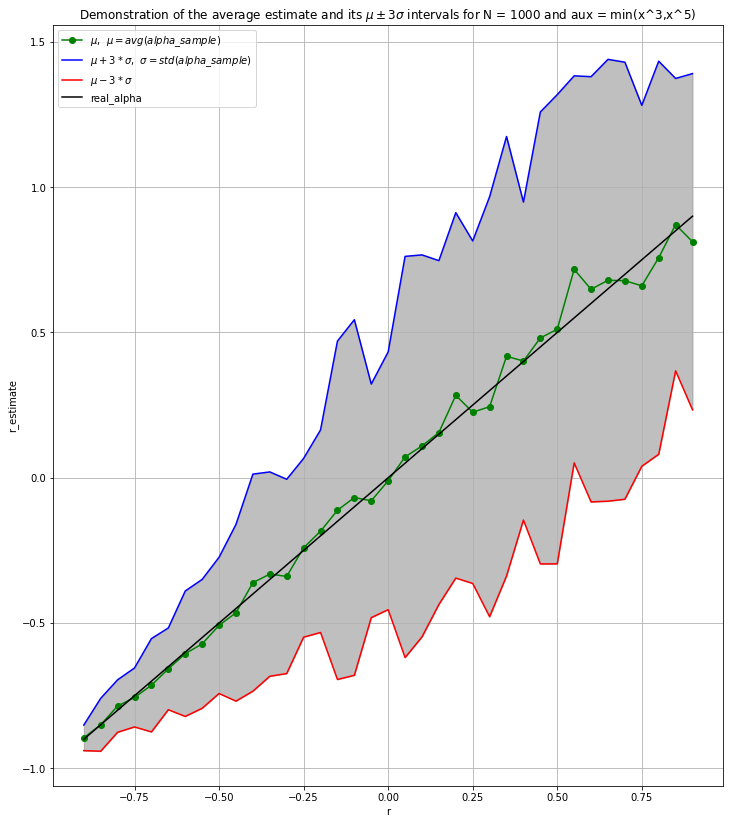

In [ ]:
visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates))

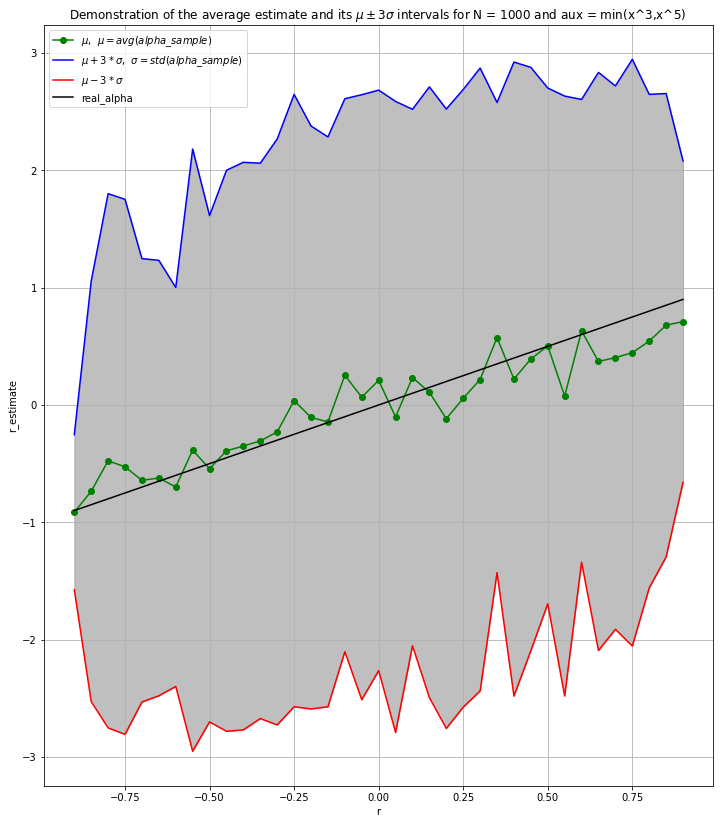

In [ ]:
visualize(Alphas, avg_CORR, np.array(avg_CORR)+3*np.array(std_CORR), np.array(avg_CORR)-3*np.array(std_CORR))

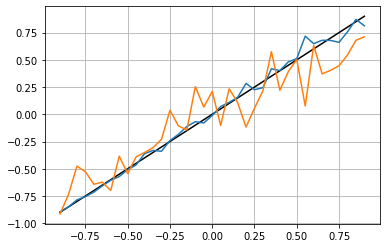

In [ ]:
plt.plot(Alphas,Alphas,'k')
plt.plot(Alphas, avg_MLP_estimates)
plt.plot(Alphas, avg_CORR)
plt.grid()

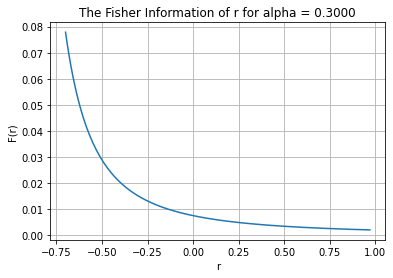

In [ ]:
x_vals = np.arange(-0.7, 0.98, 0.01)
y_vals = []
for x in x_vals:
    y_vals.append(fisher_info1(T, x))
plt.plot(x_vals, y_vals)
plt.title(f'The Fisher Information of r for alpha = {truncate_string(alph)}')
plt.xlabel('r')
plt.ylabel('F(r)')
plt.grid()
plt.show()

In [ ]:
Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alpha, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    R_est = r_estimate(samples, alph, 0.01)
    if R_est <= 0:
       alpha_straighforward = R_est
    else:
       samples[:, 1] = -samples[:, 1]
       R_est = r_estimate(samples, alph, 0.01)
       alpha_straighforward = -R_est
 
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(corr_biv(samples))
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}") 
  

for r = -0.900, avg_r_MLP = -0.897, avg_r_corr = -0.724, std(MLP) = 0.0184
for r = -0.850, avg_r_MLP = -0.834, avg_r_corr = -0.718, std(MLP) = 0.0216
for r = -0.800, avg_r_MLP = -0.791, avg_r_corr = -0.649, std(MLP) = 0.0421
for r = -0.750, avg_r_MLP = -0.734, avg_r_corr = -0.417, std(MLP) = 0.0413
for r = -0.700, avg_r_MLP = -0.673, avg_r_corr = -0.688, std(MLP) = 0.0541
for r = -0.650, avg_r_MLP = -0.674, avg_r_corr = -0.375, std(MLP) = 0.0658
for r = -0.600, avg_r_MLP = -0.566, avg_r_corr = -0.732, std(MLP) = 0.0803
for r = -0.550, avg_r_MLP = -0.538, avg_r_corr = -0.503, std(MLP) = 0.0881
for r = -0.500, avg_r_MLP = -0.467, avg_r_corr = -0.379, std(MLP) = 0.1092
for r = -0.450, avg_r_MLP = -0.420, avg_r_corr = -0.285, std(MLP) = 0.1142
for r = -0.400, avg_r_MLP = -0.389, avg_r_corr = -0.736, std(MLP) = 0.1222
for r = -0.350, avg_r_MLP = -0.365, avg_r_corr = 0.2398, std(MLP) = 0.1107
for r = -0.300, avg_r_MLP = -0.330, avg_r_corr = -0.121, std(MLP) = 0.0854
for r = -0.250, avg_r_MLP

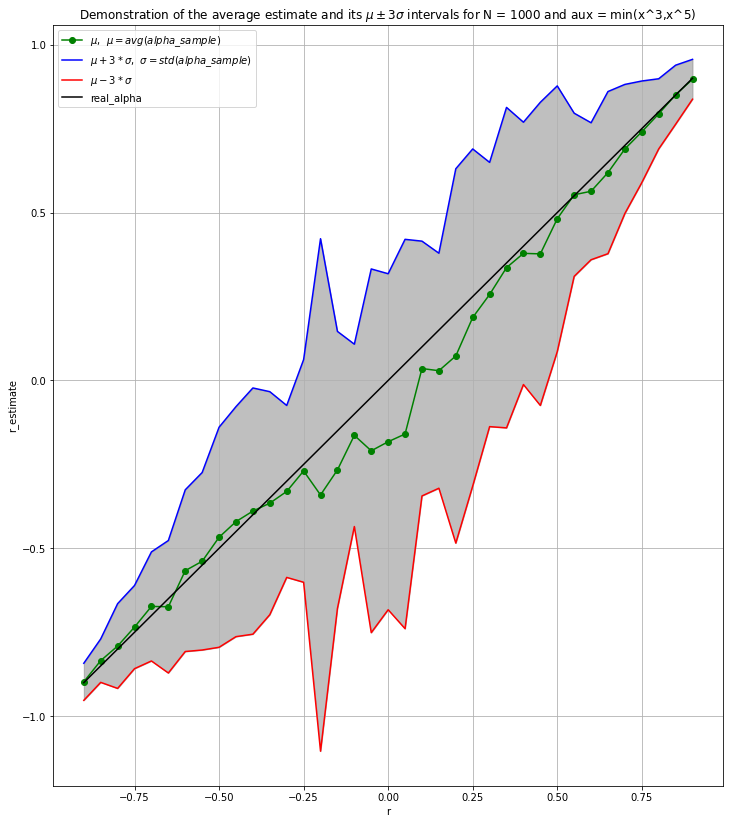

In [ ]:
visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates))

In [ ]:
N = 1000000
alpha = 1.7
r = -0.29
samples = generate_bivariate_sub_gaussian_samples(alpha, r, N)
alph = alpha_estimates_tool(samples)

A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)


Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alph, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    R_est = r_estimate(samples, alph, 0.01)
    if R_est <= 0:
       alpha_straighforward = R_est
    else:
       samples[:, 1] = -samples[:, 1]
       R_est = r_estimate(samples, alph, 0.01)
       alpha_straighforward = -R_est
 
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(corr_biv(samples))
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}") 
  

for r = -0.900, avg_r_MLP = -0.900, avg_r_corr = -0.902, std(MLP) = 0.0050
for r = -0.850, avg_r_MLP = -0.849, avg_r_corr = -0.846, std(MLP) = 0.0067
for r = -0.800, avg_r_MLP = -0.800, avg_r_corr = -0.821, std(MLP) = 0.0074
for r = -0.750, avg_r_MLP = -0.749, avg_r_corr = -0.724, std(MLP) = 0.0122
for r = -0.700, avg_r_MLP = -0.699, avg_r_corr = -0.680, std(MLP) = 0.0124
for r = -0.650, avg_r_MLP = -0.647, avg_r_corr = -0.668, std(MLP) = 0.0118
for r = -0.600, avg_r_MLP = -0.597, avg_r_corr = -0.561, std(MLP) = 0.0135
for r = -0.550, avg_r_MLP = -0.548, avg_r_corr = -0.560, std(MLP) = 0.0178
for r = -0.500, avg_r_MLP = -0.492, avg_r_corr = -0.501, std(MLP) = 0.0266
for r = -0.450, avg_r_MLP = -0.448, avg_r_corr = -0.473, std(MLP) = 0.0163
for r = -0.400, avg_r_MLP = -0.399, avg_r_corr = -0.307, std(MLP) = 0.0267
for r = -0.350, avg_r_MLP = -0.354, avg_r_corr = -0.368, std(MLP) = 0.0262
for r = -0.300, avg_r_MLP = -0.299, avg_r_corr = -0.248, std(MLP) = 0.0236
for r = -0.250, avg_r_MLP

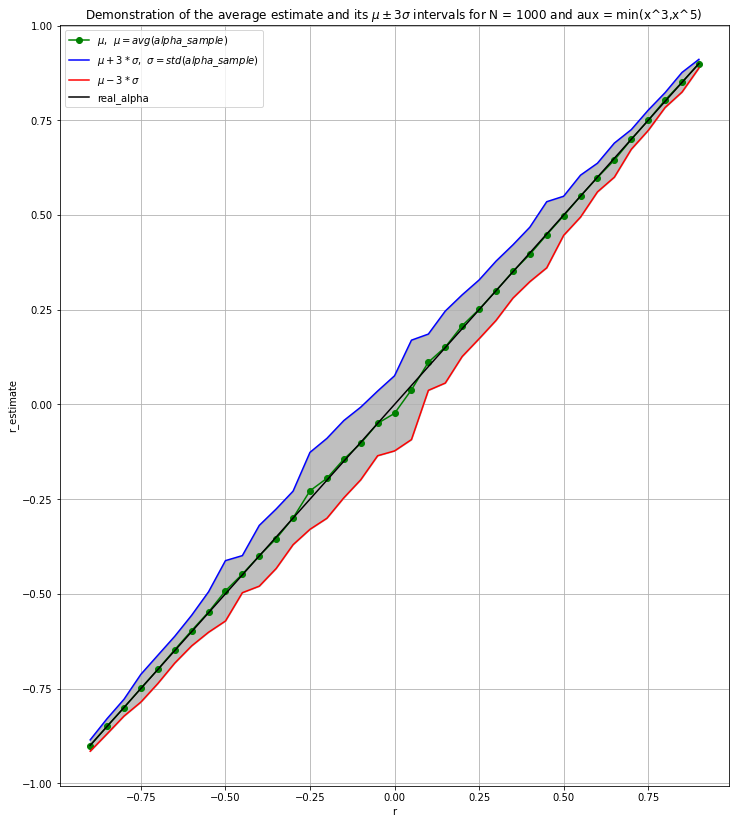

In [ ]:
visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates))

for r = -0.900, avg_r_MLP = -0.881, avg_r_corr = -0.846, std(MLP) = 0.0352
for r = -0.850, avg_r_MLP = -0.862, avg_r_corr = -0.884, std(MLP) = 0.0382
for r = -0.800, avg_r_MLP = -0.790, avg_r_corr = -0.418, std(MLP) = 0.0510
for r = -0.750, avg_r_MLP = -0.741, avg_r_corr = -0.610, std(MLP) = 0.0763
for r = -0.700, avg_r_MLP = -0.694, avg_r_corr = -0.730, std(MLP) = 0.0816
for r = -0.650, avg_r_MLP = -0.614, avg_r_corr = -0.382, std(MLP) = 0.1071
for r = -0.600, avg_r_MLP = -0.559, avg_r_corr = -0.261, std(MLP) = 0.1330
for r = -0.550, avg_r_MLP = -0.569, avg_r_corr = -0.087, std(MLP) = 0.1134
for r = -0.500, avg_r_MLP = -0.475, avg_r_corr = -0.602, std(MLP) = 0.1322
for r = -0.450, avg_r_MLP = -0.433, avg_r_corr = -0.107, std(MLP) = 0.0961
for r = -0.400, avg_r_MLP = -0.484, avg_r_corr = -0.192, std(MLP) = 0.1591
for r = -0.350, avg_r_MLP = -0.354, avg_r_corr = 0.0224, std(MLP) = 0.1897
for r = -0.300, avg_r_MLP = -0.400, avg_r_corr = -0.077, std(MLP) = 0.2728
for r = -0.250, avg_r_MLP

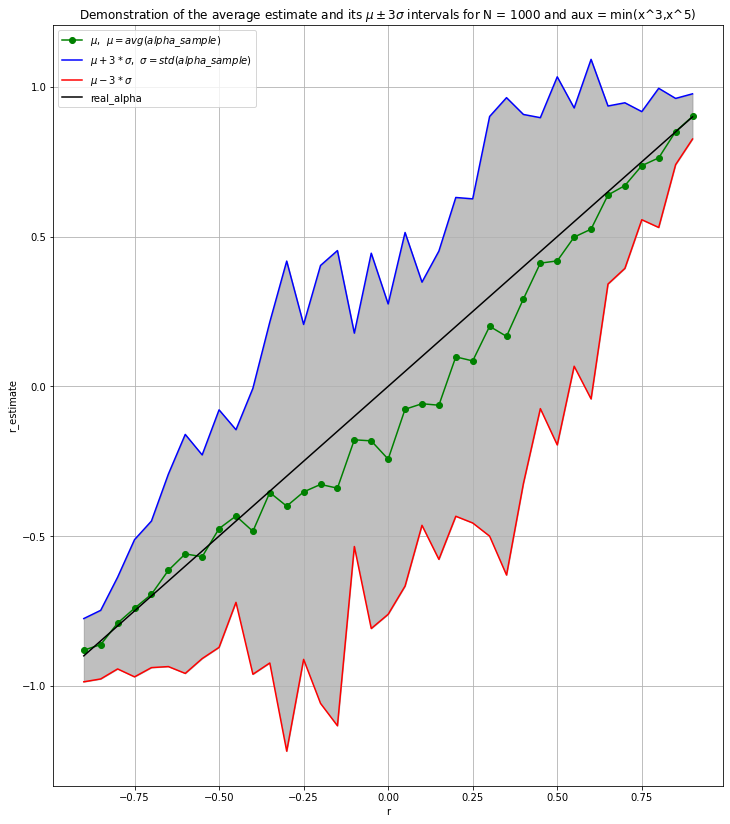

In [ ]:
N = 1000000
alpha = 0.3
r = -0.29
#samples = generate_bivariate_sub_gaussian_samples(alpha, r, N)
#alph = alpha_estimates_tool(samples)
#A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)


Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alpha, test_alpha, N)
    alph = alpha_estimates_tool(samples)
    A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)
    #samples = generate_bivariate_sub_gaussian_samples(alph, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    pearson_corr = corr_biv(samples)
    R_est = r_estimate(samples, alph, 0.01)
    if R_est <= 0:
       alpha_straighforward = R_est
    else:
       samples[:, 1] = -samples[:, 1]
       R_est = r_estimate(samples, alph, 0.01)
       alpha_straighforward = -R_est
 
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(pearson_corr)
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}") 



visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates))
  

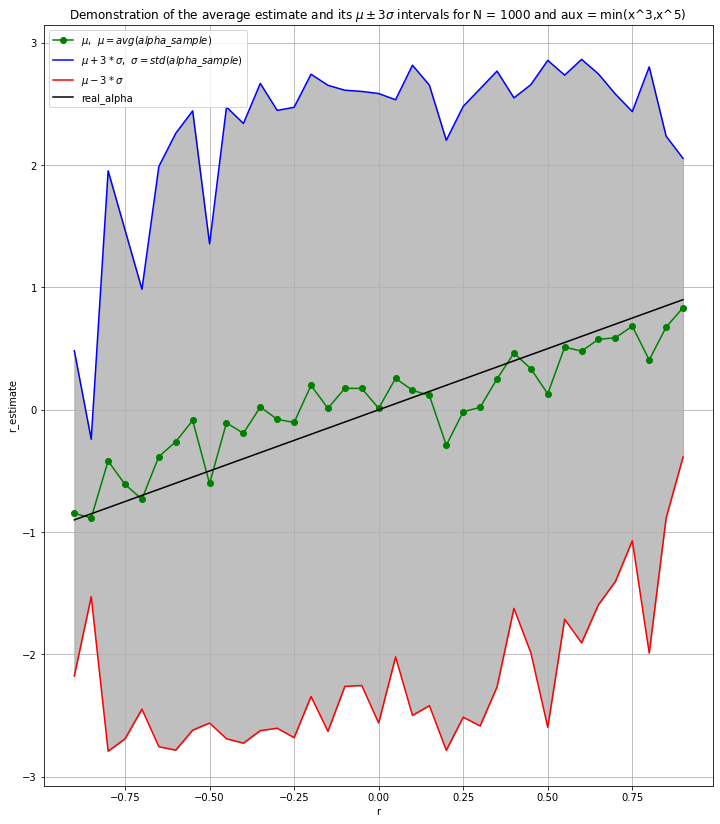

In [ ]:
visualize(Alphas, avg_CORR, np.array(avg_CORR)+3*np.array(std_CORR), np.array(avg_CORR)-3*np.array(std_CORR))

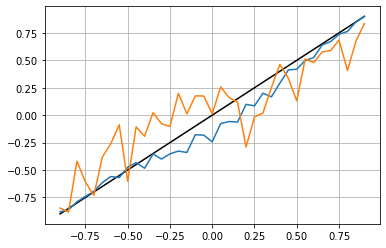

In [ ]:
plt.plot(Alphas,Alphas,'k')
plt.plot(Alphas, avg_MLP_estimates)
plt.plot(Alphas, avg_CORR)
plt.grid()

for r = -0.900, avg_r_MLP = -0.898, avg_r_corr = -0.907, std(MLP) = 0.0051
for r = -0.850, avg_r_MLP = -0.850, avg_r_corr = -0.845, std(MLP) = 0.0084
for r = -0.800, avg_r_MLP = -0.799, avg_r_corr = -0.785, std(MLP) = 0.0094
for r = -0.750, avg_r_MLP = -0.751, avg_r_corr = -0.738, std(MLP) = 0.0118
for r = -0.700, avg_r_MLP = -0.694, avg_r_corr = -0.706, std(MLP) = 0.0136
for r = -0.650, avg_r_MLP = -0.652, avg_r_corr = -0.639, std(MLP) = 0.0189
for r = -0.600, avg_r_MLP = -0.594, avg_r_corr = -0.612, std(MLP) = 0.0186
for r = -0.550, avg_r_MLP = -0.549, avg_r_corr = -0.552, std(MLP) = 0.0244
for r = -0.500, avg_r_MLP = -0.497, avg_r_corr = -0.483, std(MLP) = 0.0230
for r = -0.450, avg_r_MLP = -0.449, avg_r_corr = -0.399, std(MLP) = 0.0253
for r = -0.400, avg_r_MLP = -0.399, avg_r_corr = -0.391, std(MLP) = 0.0353
for r = -0.350, avg_r_MLP = -0.343, avg_r_corr = -0.365, std(MLP) = 0.0308
for r = -0.300, avg_r_MLP = -0.297, avg_r_corr = -0.297, std(MLP) = 0.0249
for r = -0.250, avg_r_MLP

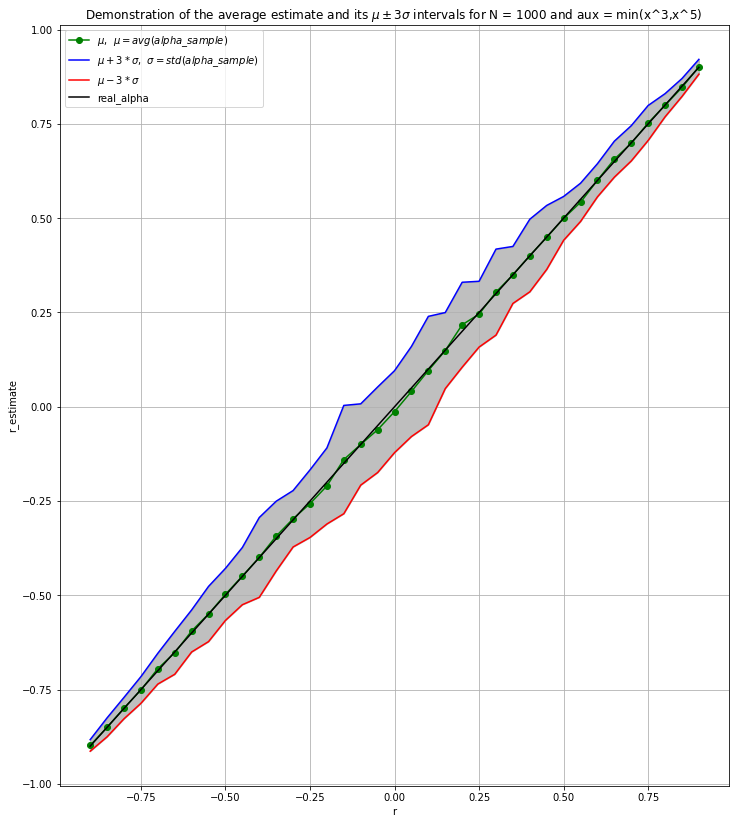

In [ ]:
N = 1000000
alpha = 1.9
r = -0.29
#samples = generate_bivariate_sub_gaussian_samples(alpha, r, N)
#alph = alpha_estimates_tool(samples)
#A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)


Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alpha, test_alpha, N)
    alph = alpha_estimates_tool(samples)
    A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)
    #samples = generate_bivariate_sub_gaussian_samples(alph, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    pearson_corr = corr_biv(samples)
    R_est = r_estimate(samples, alph, 0.01)
    if R_est <= 0:
       alpha_straighforward = R_est
    else:
       samples[:, 1] = -samples[:, 1]
       R_est = r_estimate(samples, alph, 0.01)
       alpha_straighforward = -R_est
 
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(pearson_corr)
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}")

visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates)) 
  

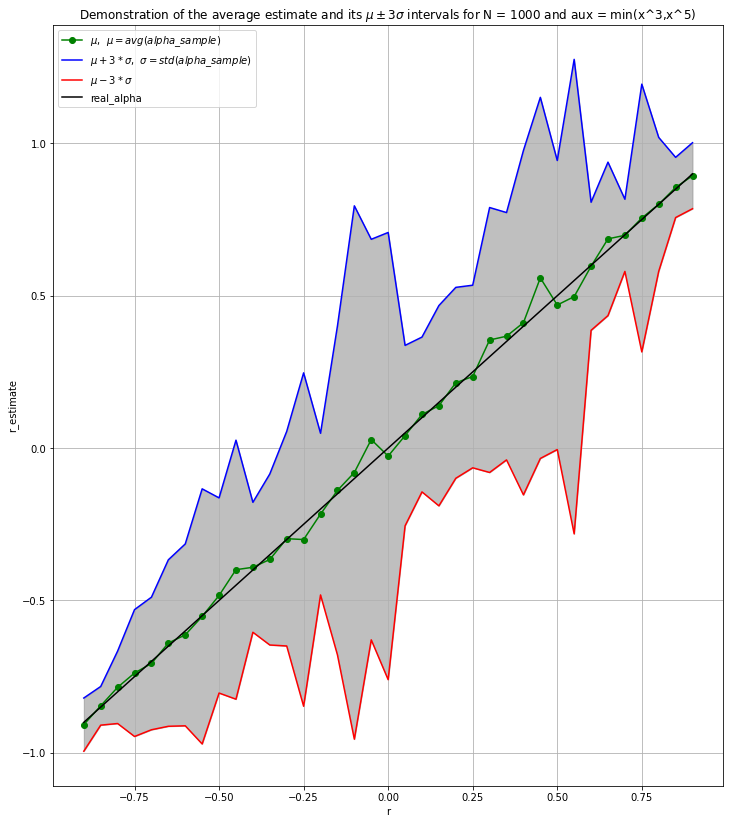

In [ ]:
visualize(Alphas, avg_CORR, np.array(avg_CORR)+3*np.array(std_CORR), np.array(avg_CORR)-3*np.array(std_CORR))

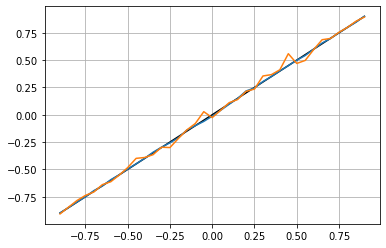

In [ ]:
plt.plot(Alphas,Alphas,'k')
plt.plot(Alphas, avg_MLP_estimates)
plt.plot(Alphas, avg_CORR)
plt.grid()

for r = -0.900, avg_r_MLP = -0.900, avg_r_corr = -0.924, std(MLP) = 0.0077
for r = -0.850, avg_r_MLP = -0.851, avg_r_corr = -0.885, std(MLP) = 0.0089
for r = -0.800, avg_r_MLP = -0.795, avg_r_corr = -0.587, std(MLP) = 0.0140
for r = -0.750, avg_r_MLP = -0.752, avg_r_corr = -0.730, std(MLP) = 0.0183
for r = -0.700, avg_r_MLP = -0.702, avg_r_corr = -0.734, std(MLP) = 0.0170
for r = -0.650, avg_r_MLP = -0.643, avg_r_corr = -0.652, std(MLP) = 0.0220
for r = -0.600, avg_r_MLP = -0.600, avg_r_corr = -0.566, std(MLP) = 0.0249
for r = -0.550, avg_r_MLP = -0.533, avg_r_corr = -0.181, std(MLP) = 0.0348
for r = -0.500, avg_r_MLP = -0.477, avg_r_corr = -0.571, std(MLP) = 0.0428
for r = -0.450, avg_r_MLP = -0.447, avg_r_corr = -0.372, std(MLP) = 0.0461
for r = -0.400, avg_r_MLP = -0.384, avg_r_corr = -0.402, std(MLP) = 0.0458
for r = -0.350, avg_r_MLP = -0.349, avg_r_corr = -0.291, std(MLP) = 0.0390
for r = -0.300, avg_r_MLP = -0.268, avg_r_corr = -0.021, std(MLP) = 0.0677
for r = -0.250, avg_r_MLP

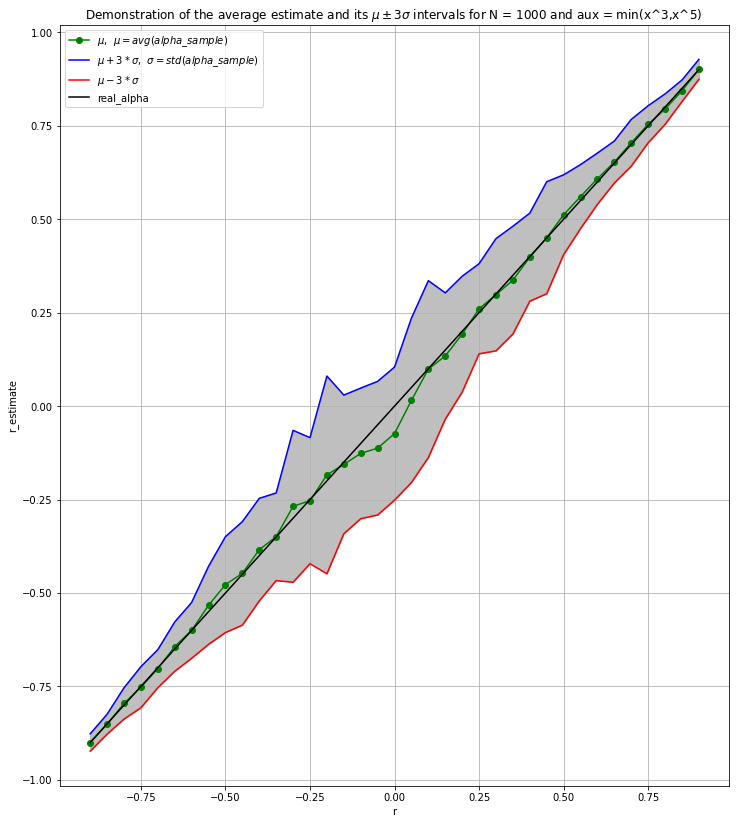

In [ ]:
N = 1000000
alpha = 1.2
r = -0.29
#samples = generate_bivariate_sub_gaussian_samples(alpha, r, N)
#alph = alpha_estimates_tool(samples)
#A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)


Alphas = np.arange(-0.9, 0.95, 0.05)
Num_Samples = 20
N = 1000
avg_MLP_estimates = []
avg_CORR = []
std_MLP_estimates = []
std_CORR = []
for test_alpha in Alphas:
  estimates = []
  estmts = []
  corrl = []
  avg_X = []
  for _ in range(Num_Samples):
    samples = generate_bivariate_sub_gaussian_samples(alpha, test_alpha, N)
    alph = alpha_estimates_tool(samples)
    A1, B1, F1, projection1, fisher_info1 = generate_r_estimation(alph)
    #samples = generate_bivariate_sub_gaussian_samples(alph, test_alpha, 2000)
    sum_samples = samples[:, 0] + samples[:, 1]

    start_alpha = -0.99 
    end_alpha = 0.99
    gran_of_choice = 0.01

    # Simulation of a sample
    X = sum_samples
    pearson_corr = corr_biv(samples)
    R_est = r_estimate(samples, alph, 0.01)
    if R_est <= 0:
       alpha_straighforward = R_est
    else:
       samples[:, 1] = -samples[:, 1]
       R_est = r_estimate(samples, alph, 0.01)
       alpha_straighforward = -R_est
 
    estimates.append(alpha_straighforward)
    estmts.append(alpha_straighforward)
    corrl.append(pearson_corr)
    avg_X.append(np.mean(X))
  avg_MLP_estimates.append(np.mean(estimates))
  avg_CORR.append(np.mean(corrl))
  std_MLP_estimates.append(np.std(estimates))
  std_CORR.append(np.std(corrl)) 
  print(f"for r = {truncate_string(test_alpha)}, avg_r_MLP = {truncate_string(np.mean(estimates))}, avg_r_corr = {truncate_string(np.mean(corrl))}, std(MLP) = {truncate_string(np.std(estimates))}")

visualize(Alphas, avg_MLP_estimates, np.array(avg_MLP_estimates)+3*np.array(std_MLP_estimates), np.array(avg_MLP_estimates)-3*np.array(std_MLP_estimates)) 
  